# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [34]:
import pandas as pd

import warnings
warnings.simplefilter('ignore')

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import pylab as py

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.datasets import make_circles, make_regression

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score as r2

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.model_selection import GridSearchCV        # por fuerza bruta
from sklearn.model_selection import RandomizedSearchCV  # este es random

In [35]:
# Your code here. 
StudentID = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
Tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]


student_data= pd.DataFrame({'Age': Age, 'Tardies': Tardies})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<Axes: >

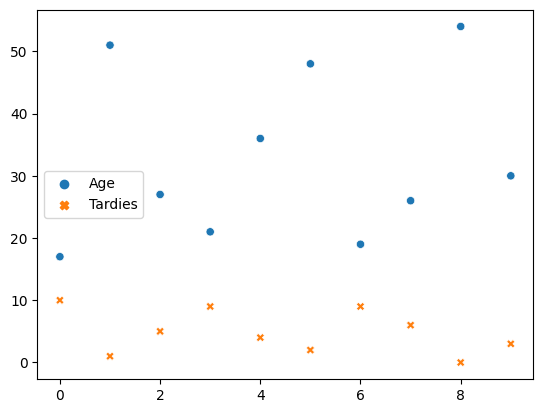

In [36]:
# Your code here.
sns.scatterplot(student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

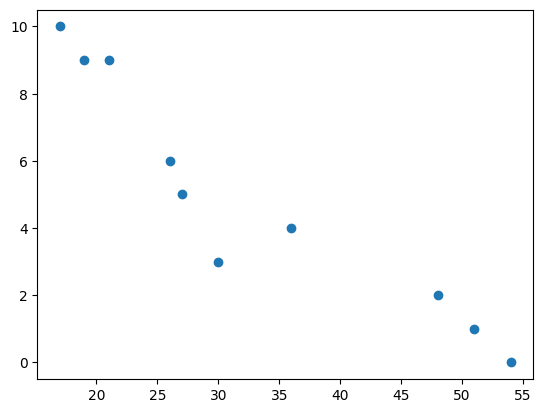

In [37]:
plt.scatter(student_data.Age, student_data.Tardies)

In [38]:
# Your response here. 

'''#There could be a possible relationship between the two data series, but I could not say they are very correlated as it is.
'''

#After properly plotting the graph, I can see a more obvious relation, indicating an inverted correlation between the two columns. The higher the Age, the lower the Tardies


'#There could be a possible relationship between the two data series, but I could not say they are very correlated as it is.\n'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [39]:
# Your response here.

Correlation= student_data.corr()

In [40]:
Covar= student_data.cov()
Covar

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [41]:
student_data['Age']

0    17
1    51
2    27
3    21
4    36
5    48
6    19
7    26
8    54
9    30
Name: Age, dtype: int64

In [42]:
Age

[17, 51, 27, 21, 36, 48, 19, 26, 54, 30]

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(student_data['Age'], student_data['Tardies'], test_size=0.2, random_state=42)

In [44]:
# Your response here.

modeloLS = sm.OLS(y_train, X_train).fit() #It is a linear regression model, since there are only two columns in the dataframe, and using more complex models would seem excessive for the simplicity of the data.


y_pred= modeloLS.predict(X_test)
print (modeloLS.summary(), 
       '\n', 'Y predictions: ', y_pred)


                                 OLS Regression Results                                
Dep. Variable:                Tardies   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              8.151
Date:                Wed, 24 May 2023   Prob (F-statistic):                      0.0245
Time:                        21:07:23   Log-Likelihood:                         -23.400
No. Observations:                   8   AIC:                                      48.80
Df Residuals:                       7   BIC:                                      48.88
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [45]:
X_test

8    54
1    51
Name: Age, dtype: int64

In [46]:
modeloLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Tardies   R-squared (uncentered):                   0.538
Model:                            OLS   Adj. R-squared (uncentered):              0.472
Method:                 Least Squares   F-statistic:                              8.151
Date:                Wed, 24 May 2023   Prob (F-statistic):                      0.0245
Time:                        21:07:25   Log-Likelihood:                         -23.400
No. Observations:                   8   AIC:                                      48.80
Df Residuals:                       7   BIC:                                      48.88
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.1645      0.058      2.855      0.025       0.028       0.301
==============================================================================
Omnibus:                        0.591   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.744   Jarque-Bera (JB):                0.504
Skew:                          -0.165   Prob(JB):                        0.777
Kurtosis:                       1.815   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

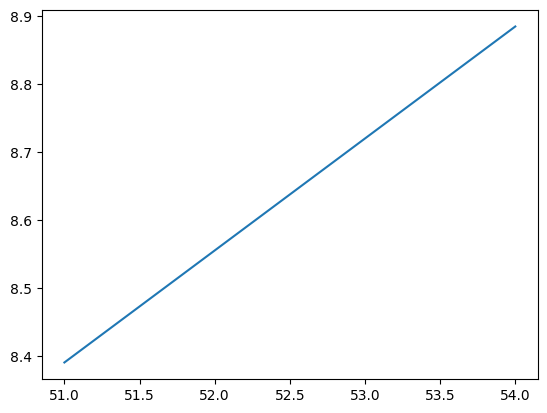

In [52]:

plt.plot(X_test, y_pred)


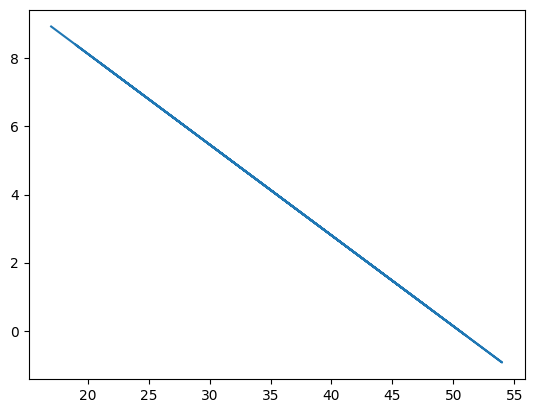

In [53]:
plt.plot(student_data.Age , linreg.predict(student_data.Age.values.reshape(-1,1)))


In [48]:
student_data.Tardies

0    10
1     1
2     5
3     9
4     4
5     2
6     9
7     6
8     0
9     3
Name: Tardies, dtype: int64

In [55]:
from sklearn.linear_model import LinearRegression as LinReg

linreg = LinReg()

X_train_reshaped = X_train.values.reshape((-1, 1))  # Reshape X_train to a 2D array

linreg.fit(X_train_reshaped, y_train)



linreg.intercept_
linreg.coef_
linreg.predict(X_test.values.reshape(-1,1))

linreg.predict(X_train_reshaped)


array([0.66850829, 8.93232044, 6.53314917, 6.26657459, 5.46685083,
       3.86740331, 7.8660221 , 8.39917127])

Plot your regression model on your scatter plot.

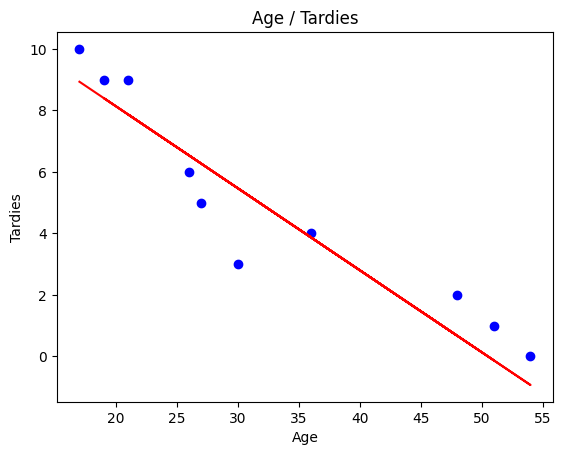

In [56]:
plt.scatter(student_data.Age, student_data.Tardies, c='blue') 
plt.plot(student_data.Age , linreg.predict(student_data.Age.values.reshape(-1,1)), c='red') 
plt.xlabel('Age')
plt.ylabel('Tardies') 
plt.title('Age / Tardies') 
plt.show();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 

'''Based on the graphic, as well as the summary of the model, we could say with 95% certainty that there IS some relation between the two variables.
However, based on the value of R^2, we can see the model fits only moderately well with the data.
The coefficient for Age indicates that approximately, for every unit increase in age, there is an expected increase of in tardies by 0.1645
The main take for this is that more observations are needed to increase the robustness of the model'''

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [58]:
# Import any libraries you may need & the data

Vehicles = pd.read_csv('vehicles.csv')

In [59]:
Vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [60]:
Vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [68]:
# Your response here. 
Vehicles_analysis= Vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].copy() 
Vehicles_analysis
Vehicles_analysis.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [71]:
X = pd.DataFrame(Vehicles_analysis[["Year","Cylinders",	"Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]])
y = pd.DataFrame(Vehicles_analysis['CO2 Emission Grams/Mile'], columns = ['CO2 Emission Grams/Mile'])

data = pd.concat([X, y], axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(28761, 5) (7191, 5) (28761, 1) (7191, 1)


In [95]:
y_train

,CO2 Emission Grams/Mile
17468,444.350000
27931,296.233333
22900,444.350000
19372,421.000000
5960,565.555556
...,...
16850,423.190476
6265,555.437500
11284,807.909091
860,374.000000


In [93]:
# Your response here. 
rfr=RFR()

Barbol = rfr.fit(X_train, y_train)

y_pred= rfr.predict(X_test)
y_pred

len(y_pred)

7191

In [89]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred, squared=False)
mse

3.102854807935473

In [87]:
#R2
train_score=rfr.score(X_train, y_train)
test_score=rfr.score(X_test, y_test)


print ('Train: ',train_score)
print('Test: ', test_score)

Train:  0.9995670762342361
Test:  0.9993174968201166


In [97]:
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X)

Ent = rfr.fit(X_norm, y)

Ent_stats = dict(zip(X.columns, Ent.feature_importances_ * 100))

Ent_stats


{'Year': 0.013912447814388745,
 'Cylinders': 0.006757073237976693,
 'Fuel Barrels/Year': 83.71136709115085,
 'Combined MPG': 16.213093924763207,
 'Fuel Cost/Year': 0.05486946303357476}

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [98]:
# Your response here. 
print ('Mean Squared Error: ', mse)
print ('Train: ',train_score)
print('Test: ', test_score)
print('Column impact: ', Ent_stats)

#This whole set of values indicate that the model is mostly a good fit, as the mse is small compared to the scale of the values in our column, and both train and test values have a value that is very close to 1.
#The final element indicates that out of all the columns present in our dataframe, the one with the most impact on 'y' is 'Fuel Barrels/Year', followed way behind by 'Combined MPG'.

Mean Squared Error:  3.102854807935473
Train:  0.9995670762342361
Test:  0.9993174968201166
Column impact:  {'Year': 0.013912447814388745, 'Cylinders': 0.006757073237976693, 'Fuel Barrels/Year': 83.71136709115085, 'Combined MPG': 16.213093924763207, 'Fuel Cost/Year': 0.05486946303357476}


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [102]:
# Your code here. 
X= pd.Series([1, 3, 4, 6, 8, 9, 11, 14])
Y = pd.Series([1, 2, 4, 4, 5, 7, 8, 13])
Parties = pd.concat([X, Y], axis= 1)
Parties

,0,1
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

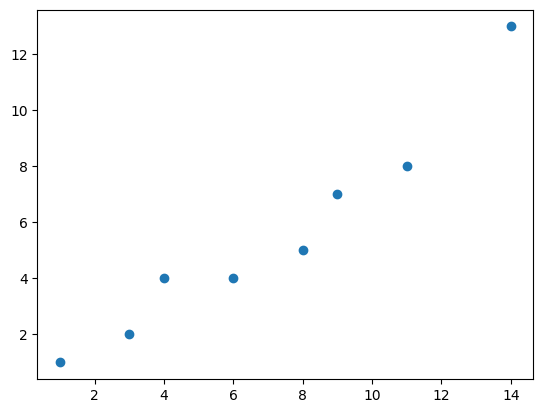

In [104]:
# Your code here.
plt.scatter(X, Y)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [152]:
# Your response here. 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [153]:
Partymodel = sm.OLS(Y_train, X_train).fit() #It is a linear regression model, since there are only two columns in the dataframe, and using more complex models would seem excessive for the simplicity of the data.


'''Y_pred= Partymodel.predict(X_test)
print (Partymodel.summary(), 
       '\n', 'Y predictions: ', Y_pred)'''


Y_pred= Partymodel.predict(X)
print (Partymodel.summary(), 
       '\n', 'Y predictions: ', Y_pred)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              199.2
Date:                Thu, 25 May 2023   Prob (F-statistic):                    3.22e-05
Time:                        16:33:33   Log-Likelihood:                         -9.0299
No. Observations:                   6   AIC:                                      20.06
Df Residuals:                       5   BIC:                                      19.85
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

ValueError: x and y must have same first dimension, but have shapes (2,) and (7191,)

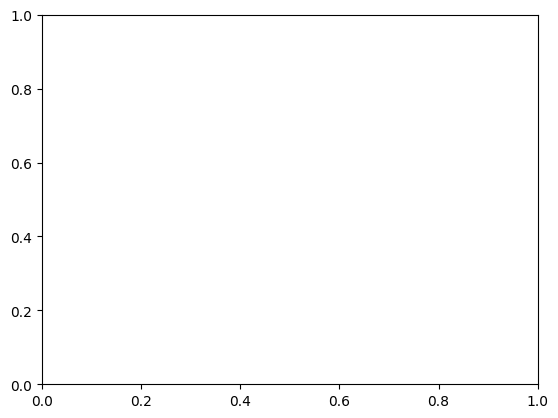

In [155]:
plt.plot(X_test, y_pred)


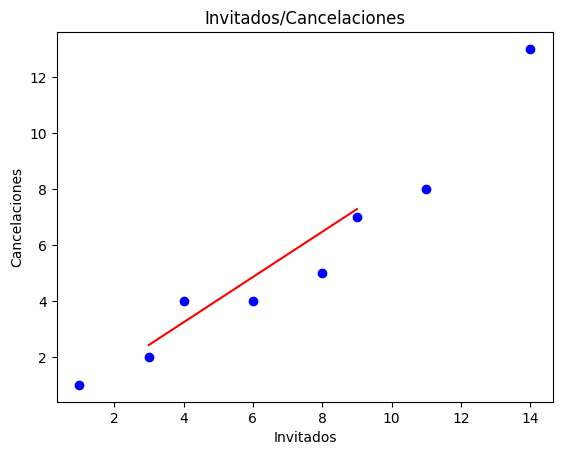

In [125]:
plt.scatter(X, Y, c='blue') 
plt.plot(X_test, Y_pred, c='red') 
plt.xlabel('Invitados')
plt.ylabel('Cancelaciones') 
plt.title('Invitados/Cancelaciones') 
plt.show();

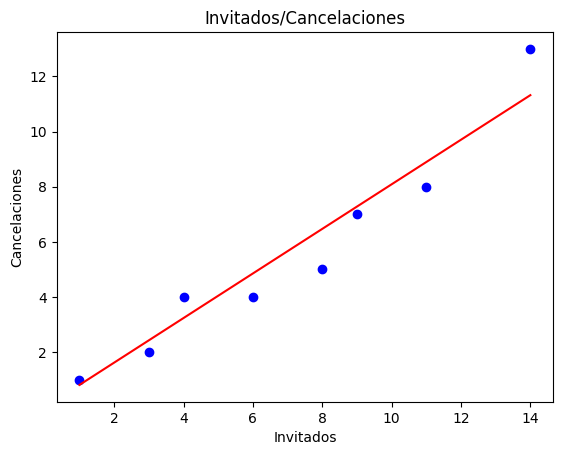

In [128]:
plt.scatter(X, Y, c='blue') 
plt.plot(X, Y_pred, c='red') 
plt.xlabel('Invitados')
plt.ylabel('Cancelaciones') 
plt.title('Invitados/Cancelaciones') 
plt.show();

In [115]:
linreg.predict(student_data.Age.values.reshape(-1,1))

array([ 8.93232044, -0.13121547,  6.26657459,  7.8660221 ,  3.86740331,
        0.66850829,  8.39917127,  6.53314917, -0.93093923,  5.46685083])

In [119]:
X_train

0     1
7    14
2     4
4     8
3     6
6    11
dtype: int64

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [131]:
# Your response here. 
'''new_Parties = Parties.iloc[:-1]
new_Parties'''

X2= pd.Series([1, 3, 4, 6, 8, 9, 11])
Y2 = pd.Series([1, 2, 4, 4, 5, 7, 8])
new_Parties = pd.concat([X2, Y2], axis= 1)
new_Parties

,0,1
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [142]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)


In [146]:
NewPartymodel = sm.OLS(Y_train2, X_train2).fit() #It is a linear regression model, since there are only two columns in the dataframe, and using more complex models would seem excessive for the simplicity of the data.


'''Y_pred= Partymodel.predict(X_test)
print (Partymodel.summary(), 
       '\n', 'Y predictions: ', Y_pred)'''


Y_pred2= NewPartymodel.predict(X2)
print (NewPartymodel.summary(), 
       '\n', 'Y predictions: ', Y_pred2)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              305.4
Date:                Thu, 25 May 2023   Prob (F-statistic):                    6.30e-05
Time:                        14:30:38   Log-Likelihood:                         -5.0401
No. Observations:                   5   AIC:                                      12.08
Df Residuals:                       4   BIC:                                      11.69
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

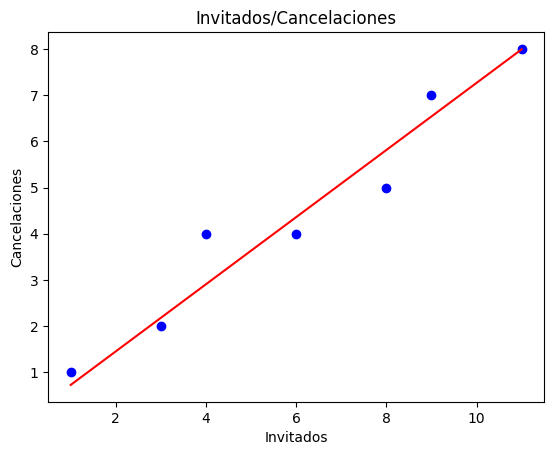

In [149]:
plt.scatter(X2, Y2, c='blue') 
plt.plot(X2, Y_pred2, c='red') 
plt.xlabel('Invitados')
plt.ylabel('Cancelaciones') 
plt.title('Invitados/Cancelaciones') 
plt.show();

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 

#The R squared changed between the two graphs. The coeficient and the standard deviation decreased as well, making it past the threshold in the second case, and thus confirming thta both variable are related.
#The last point was too far off when compared to the rest to properly fit, but since the model was already very precise, its impact was not massive. But taking it out changed the significance level enough.